In [1]:
!wget https://mslearntensorflowlp.blob.core.windows.net/data/petfaces.tar.gz
!tar xfz petfaces.tar.gz
!rm petfaces.tar.gz

--2022-05-20 21:17:21--  https://mslearntensorflowlp.blob.core.windows.net/data/petfaces.tar.gz
Resolving mslearntensorflowlp.blob.core.windows.net (mslearntensorflowlp.blob.core.windows.net)... 20.150.90.68
Connecting to mslearntensorflowlp.blob.core.windows.net (mslearntensorflowlp.blob.core.windows.net)|20.150.90.68|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 24483412 (23M) [application/x-gzip]
Saving to: ‘petfaces.tar.gz’

petfaces.tar.gz     100%[===================>]  23.35M  11.3MB/s    in 2.1s    

2022-05-20 21:17:24 (11.3 MB/s) - ‘petfaces.tar.gz’ saved [24483412/24483412]



In [2]:
import matplotlib.pyplot as plt
import os
from PIL import Image
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, auc, accuracy_score, recall_score, precision_score, roc_curve, RocCurveDisplay, roc_auc_score

In [3]:
def display_images(l,titles=None,fontsize=12):
    n=len(l)
    fig,ax = plt.subplots(1,n)
    for i,im in enumerate(l):
        ax[i].imshow(im)
        ax[i].axis('off')
        if titles is not None:
            ax[i].set_title(titles[i],fontsize=fontsize)
    fig.set_size_inches(fig.get_size_inches()*n)
    plt.tight_layout()
    plt.show()

In [4]:
import keras

batch_size = 10
img_size = (128, 128)

data_gen_aug = keras.preprocessing.image.ImageDataGenerator(rescale=1./255., validation_split=0.2,
                                                        rotation_range = 30, horizontal_flip = True, zoom_range = 0.2)
data_gen = keras.preprocessing.image.ImageDataGenerator(rescale=1./255., validation_split=0.2)

train_flow = data_gen_aug.flow_from_directory("/content/petfaces", batch_size = batch_size, target_size=img_size,  subset="training", seed=20, class_mode = 'categorical')
test_flow = data_gen.flow_from_directory("/content/petfaces", batch_size = batch_size, target_size=img_size, subset="validation", seed=20, class_mode = 'categorical', shuffle = False)

Found 2583 images belonging to 35 classes.
Found 628 images belonging to 35 classes.


In [5]:
lablesNames = ['cat_Abyssinian', 'cat_Bengal', 'cat_Birman', 'cat_Bombay', 
               'cat_British', 'cat_Egyptian', 'cat_Maine', 'cat_Persian', 
               'cat_Ragdoll', 'cat_Russian', 'cat_Siamese', 'cat_Sphynx',
               'dog_american', 'dog_basset', 'dog_beagle', 'dog_boxer', 
               'dog_chihuahua', 'dog_english', 'dog_german', 'dog_great', 
               'dog_havanese', 'dog_japanese', 'dog_keeshond', 'dog_leonberger', 
               'dog_miniature', 'dog_newfoundland', 'dog_pomeranian', 'dog_pug', 
               'dog_saint', 'dog_samoyed', 'dog_scottish', 'dog_shiba', 
               'dog_staffordshire', 'dog_wheaten', 'dog_yorkshire']

classesNum = len(lablesNames)

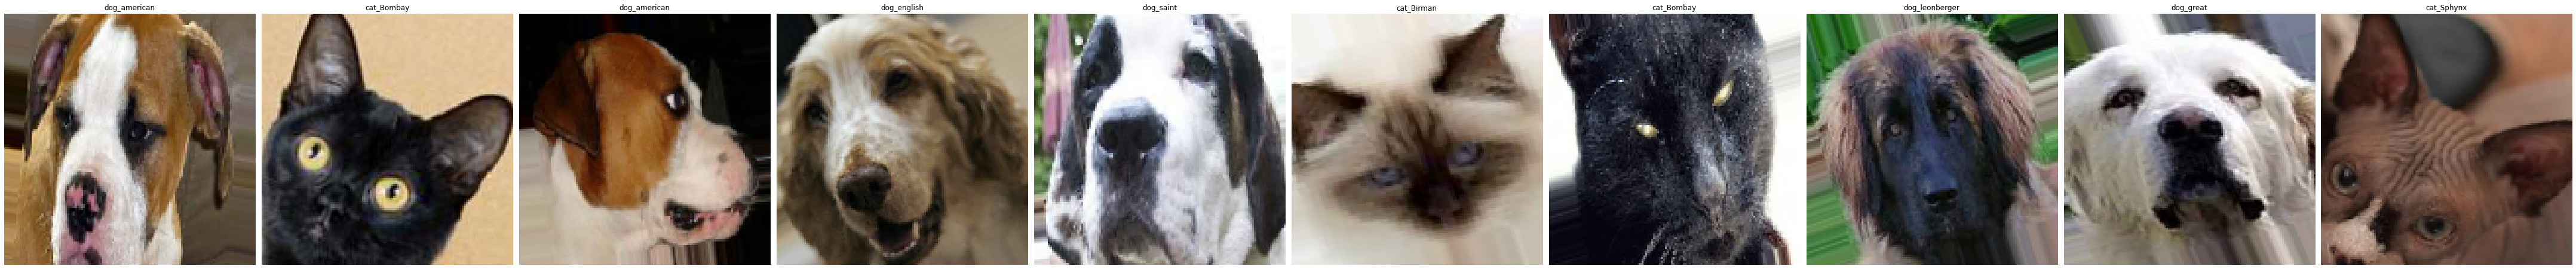

In [6]:
display_images(train_flow[0][0], [lablesNames[i] for i in np.argmax(train_flow[0][1], axis = 1)])

In [7]:
from keras.layers import *
model = keras.models.Sequential()
model.add(Conv2D(32, (15, 15), input_shape=(128, 128, 3), activation='tanh'))
model.add(MaxPooling2D())
model.add(Conv2D(64, (5, 5), activation='tanh'))
model.add(MaxPooling2D())
model.add(Dense(128,  activation="relu"))
model.add(Dense(128,  activation="tanh"))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(1024,  activation="tanh"))
model.add(Dense(1024,  activation="tanh"))
model.add(Dense(512,  activation="tanh"))
model.add(Dense(35, activation='softmax'))

model.compile(tf.keras.optimizers.Adam(0.0001), 'categorical_crossentropy', ['accuracy', tf.keras.metrics.TopKCategoricalAccuracy(3)])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 114, 114, 32)      21632     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 57, 57, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 53, 53, 64)        51264     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 26, 26, 64)       0         
 2D)                                                             
                                                                 
 dense (Dense)               (None, 26, 26, 128)       8320      
                                                                 
 dense_1 (Dense)             (None, 26, 26, 128)       1

In [8]:
hist = model.fit(train_flow,
  epochs = 20,
  validation_data = test_flow)

Epoch 1/20


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  This is separate from the ipykernel package so we can avoid doing imports until


259/259 [==============================] - 19s 60ms/step - loss: 3.2338 - accuracy: 0.1138 - top_k_categorical_accuracy: 0.2652 - val_loss: 2.7237 - val_accuracy: 0.2341 - val_top_k_categorical_accuracy: 0.4586
Epoch 2/20
259/259 [==============================] - 15s 58ms/step - loss: 2.4970 - accuracy: 0.2679 - top_k_categorical_accuracy: 0.5350 - val_loss: 2.1178 - val_accuracy: 0.3694 - val_top_k_categorical_accuracy: 0.6417
Epoch 3/20
259/259 [==============================] - 15s 59ms/step - loss: 2.0642 - accuracy: 0.3922 - top_k_categorical_accuracy: 0.6566 - val_loss: 2.1874 - val_accuracy: 0.3503 - val_top_k_categorical_accuracy: 0.6210
Epoch 4/20
259/259 [==============================] - 15s 59ms/step - loss: 1.8388 - accuracy: 0.4588 - top_k_categorical_accuracy: 0.7154 - val_loss: 1.7371 - val_accuracy: 0.4793 - val_top_k_categorical_accuracy: 0.7484
Epoch 5/20
259/259 [==============================] - 15s 58ms/step - loss: 1.6507 - accuracy: 0.4994 - top_k_categorical_a

Точность классификатора на тестовом датасете

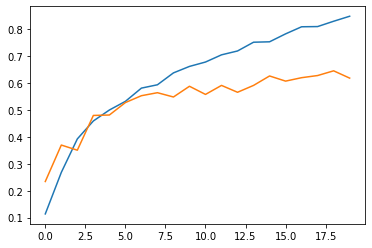

In [9]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])

In [10]:
n_batches = len(test_flow)

test_labels = np.concatenate([np.argmax(test_flow[i][1], axis = 1) for i in range(n_batches)])    
predictions = np.argmax(model.predict(test_flow, steps = n_batches), axis=1) 

In [11]:
m = tf.keras.metrics.Accuracy()
m.update_state(test_labels, predictions)
m.result().numpy()

0.6178344

Точность двоичной классификации "кошки против собак" на текстовом датасете

In [12]:
binary_test_labels = test_labels.copy()
binary_test_labels[binary_test_labels < 12] = 0
binary_test_labels[binary_test_labels >= 12] = 1

binary_predictions = predictions.copy()
binary_predictions[binary_predictions < 12] = 0
binary_predictions[binary_predictions >= 12] = 1

In [13]:
m = tf.keras.metrics.Accuracy()
m.update_state(binary_test_labels, binary_predictions)
m.result().numpy()

0.9410828

Confusion matrix

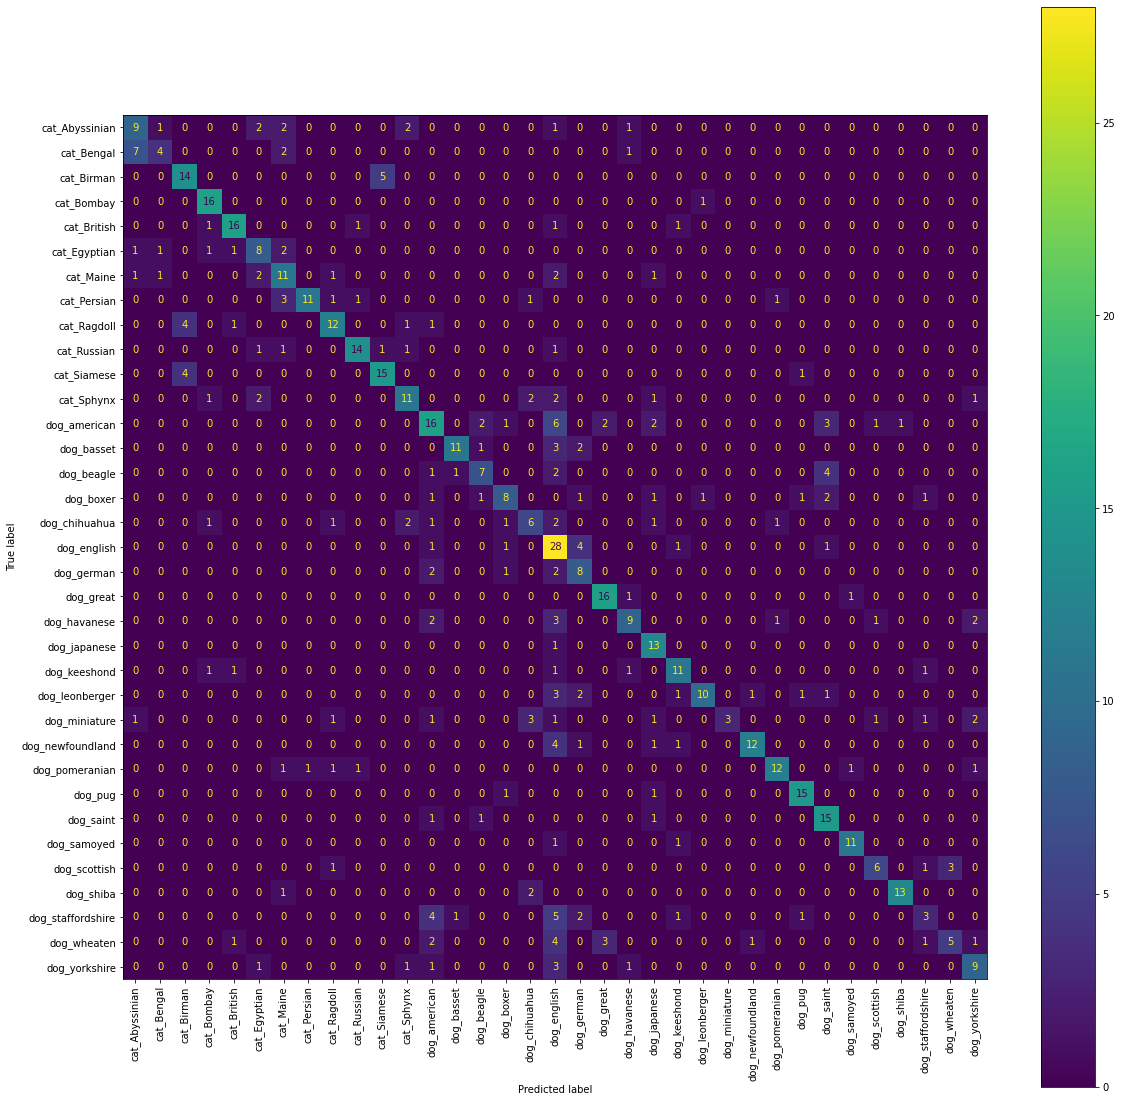

In [14]:
cm = confusion_matrix(test_labels, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix = cm,
                               display_labels = lablesNames)

fig = plt.figure(figsize = (10, 10))
ax = fig.add_axes([0, 0, 1.5, 1.5])

disp.plot(ax = ax, xticks_rotation='vertical')
plt.show()

Top-3 accuracy

In [15]:
predicted_proba_distribution = model.predict(test_flow, steps = n_batches)
one_hot_test_labels = np.concatenate([test_flow[i][1] for i in range(n_batches)])

In [16]:
m = tf.keras.metrics.TopKCategoricalAccuracy(k = 3)
m.update_state(one_hot_test_labels,
               predicted_proba_distribution)
m.result().numpy()

0.8423567

Оптимизация гиперпараметров

In [19]:
learning_rates = [0.001, 0.00001, 0.000001]

for lr in learning_rates:
  from keras.layers import *
  model = keras.models.Sequential()
  model.add(Conv2D(32, (15, 15), input_shape=(128, 128, 3), activation='tanh'))
  model.add(MaxPooling2D())
  model.add(Conv2D(64, (5, 5), activation='tanh'))
  model.add(MaxPooling2D())
  model.add(Dense(128,  activation="relu"))
  model.add(Dense(128,  activation="tanh"))
  model.add(Conv2D(128, (3, 3), activation='relu'))
  model.add(MaxPooling2D())
  model.add(Flatten())
  model.add(Dense(1024,  activation="tanh"))
  model.add(Dense(1024,  activation="tanh"))
  model.add(Dense(512,  activation="tanh"))
  model.add(Dense(35, activation='softmax'))

  model.compile(tf.keras.optimizers.Adam(lr), 'categorical_crossentropy', ['accuracy', tf.keras.metrics.TopKCategoricalAccuracy(3)])

  hist = model.fit(train_flow,
    epochs = 20,
    validation_data = test_flow,
    verbose = 0)
  n_batches = len(test_flow)

  test_labels = np.concatenate([np.argmax(test_flow[i][1], axis = 1) for i in range(n_batches)])    
  predictions = np.argmax(model.predict(test_flow, steps = n_batches), axis=1)

  m = tf.keras.metrics.Accuracy()
  m.update_state(test_labels, predictions)
  print('learning_rate = ', lr)
  print('accuracy = ', m.result().numpy())

learning_rate =  0.001
accuracy =  0.02388535
learning_rate =  1e-05
accuracy =  0.5
learning_rate =  1e-06
accuracy =  0.29617834


In [20]:
neurons_nums = [512, 2048, 4096]

for neurons_num in neurons_nums:
  from keras.layers import *
  model = keras.models.Sequential()
  model.add(Conv2D(32, (15, 15), input_shape=(128, 128, 3), activation='tanh'))
  model.add(MaxPooling2D())
  model.add(Conv2D(64, (5, 5), activation='tanh'))
  model.add(MaxPooling2D())
  model.add(Dense(128,  activation="relu"))
  model.add(Dense(128,  activation="tanh"))
  model.add(Conv2D(128, (3, 3), activation='relu'))
  model.add(MaxPooling2D())
  model.add(Flatten())
  model.add(Dense(neurons_num,  activation="tanh"))
  model.add(Dense(neurons_num,  activation="tanh"))
  model.add(Dense(neurons_num,  activation="tanh"))
  model.add(Dense(35, activation='softmax'))

  model.compile(tf.keras.optimizers.Adam(0.0001), 'categorical_crossentropy', ['accuracy', tf.keras.metrics.TopKCategoricalAccuracy(3)])

  hist = model.fit(train_flow,
    epochs = 20,
    validation_data = test_flow,
    verbose = 0)
  n_batches = len(test_flow)

  test_labels = np.concatenate([np.argmax(test_flow[i][1], axis = 1) for i in range(n_batches)])    
  predictions = np.argmax(model.predict(test_flow, steps = n_batches), axis=1)

  m = tf.keras.metrics.Accuracy()
  m.update_state(test_labels, predictions)
  print('neurons_num = ', neurons_num)
  print('accuracy = ', m.result().numpy())

neurons_num =  512
accuracy =  0.6321656
neurons_num =  2048
accuracy =  0.5955414
neurons_num =  4096
accuracy =  0.58280253


In [21]:
filter_sizes = [[8, 4, 2],
                [20, 10, 5],
                [30, 15, 7]]

for filter_size in filter_sizes:
  from keras.layers import *
  model = keras.models.Sequential()
  model.add(Conv2D(32, (filter_size[0], filter_size[0]), input_shape=(128, 128, 3), activation='tanh'))
  model.add(MaxPooling2D())
  model.add(Conv2D(64, (filter_size[1], filter_size[1]), activation='tanh'))
  model.add(MaxPooling2D())
  model.add(Dense(128,  activation="relu"))
  model.add(Dense(128,  activation="tanh"))
  model.add(Conv2D(128, (filter_size[2], filter_size[2]), activation='relu'))
  model.add(MaxPooling2D())
  model.add(Flatten())
  model.add(Dense(1024,  activation="tanh"))
  model.add(Dense(1024,  activation="tanh"))
  model.add(Dense(512,  activation="tanh"))
  model.add(Dense(35, activation='softmax'))

  model.compile(tf.keras.optimizers.Adam(lr), 'categorical_crossentropy', ['accuracy', tf.keras.metrics.TopKCategoricalAccuracy(3)])

  hist = model.fit(train_flow,
    epochs = 20,
    validation_data = test_flow,
    verbose = 0)
  n_batches = len(test_flow)

  test_labels = np.concatenate([np.argmax(test_flow[i][1], axis = 1) for i in range(n_batches)])    
  predictions = np.argmax(model.predict(test_flow, steps = n_batches), axis=1)

  m = tf.keras.metrics.Accuracy()
  m.update_state(test_labels, predictions)
  print('filter_size = ', filter_size)
  print('accuracy = ', m.result().numpy())

filter_size =  [8, 4, 2]
accuracy =  0.27388534
filter_size =  [20, 10, 5]
accuracy =  0.272293
filter_size =  [30, 15, 7]
accuracy =  0.21337579


Best solution

Изначальная модель оказалась лучшей